<a href="https://colab.research.google.com/github/Mahiyan-Khan-Abir/Heart-Failure-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Heart/heart_failure_clinical_records_dataset.csv")
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

**Finding whather there is any missing value in the tuples**

In [13]:
#Finding missing data
df1 = pd.DataFrame(df)
df1.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


**Finding correlation among dependent and independent variables**

In [14]:
#Correlation
import matplotlib.pyplot as plt
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


**Assigning the dependent and independent variables**

In [15]:
x= df.iloc[:, [0,1,2,4,5,6,7,8,11]].values  
y= df.iloc[:, 12].values  
#print(x)


**Splitting the dataset into training and test set**

In [16]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

**feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

1D CNN


In [49]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten
from keras.regularizers import l2

model = Sequential()

model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs= 100, batch_size=4, verbose=1, validation_data=(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test))


Epoch 1/100
56/56 [==============================] - 5s 11ms/step - loss: 2.5986 - accuracy: 0.7098 - val_loss: 1.8347 - val_accuracy: 0.6400
Epoch 2/100
56/56 [==============================] - 0s 5ms/step - loss: 1.3722 - accuracy: 0.7054 - val_loss: 1.0596 - val_accuracy: 0.6400
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.8363 - accuracy: 0.7946 - val_loss: 0.7224 - val_accuracy: 0.7467
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.5877 - accuracy: 0.8214 - val_loss: 0.5885 - val_accuracy: 0.7867
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.8304 - val_loss: 0.5203 - val_accuracy: 0.8267
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.8259 - val_loss: 0.5018 - val_accuracy: 0.8133
Epoch 7/100
56/56 [==============================] - 0s 4ms/step - loss: 0.4350 - accuracy: 0.8393 - val_loss: 0.4910 - val_accuracy: 0.7867
Epoch 8/100


In [50]:
train_results_CNN = model.evaluate(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, verbose=0)
test_results_CNN = model.evaluate(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test, verbose=0)

# extract the loss and accuracy values
train_loss_CNN = train_results_CNN[0]
train_acc_CNN = train_results_CNN[1]
test_loss_CNN = test_results_CNN[0]
test_acc_CNN = test_results_CNN[1]

print("Train accuracy:", train_acc_CNN)
print("Test accuracy:", test_acc_CNN)

Train accuracy: 0.8928571343421936
Test accuracy: 0.8266666531562805


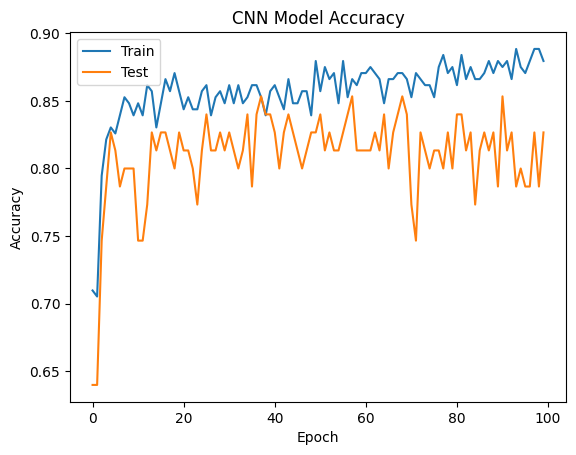

In [52]:
train_acc_CNN = history.history['accuracy']
test_acc_CNN = history.history['val_accuracy']
# plot the train and test accuracy
plt.plot(train_acc_CNN, label='Train')
plt.plot(test_acc_CNN, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')
plt.legend()
plt.show()

RNN

In [67]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# define the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
model_rnn.add(Dense(1, activation='sigmoid'))

# compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history_rnn = model_rnn.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs= 65, batch_size=32, validation_data=(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test))




Epoch 1/65
7/7 [==============================] - 6s 172ms/step - loss: 0.6726 - accuracy: 0.7411 - val_loss: 0.6639 - val_accuracy: 0.7467
Epoch 2/65
7/7 [==============================] - 0s 25ms/step - loss: 0.6500 - accuracy: 0.7545 - val_loss: 0.6463 - val_accuracy: 0.6933
Epoch 3/65
7/7 [==============================] - 0s 24ms/step - loss: 0.6187 - accuracy: 0.7143 - val_loss: 0.6285 - val_accuracy: 0.6400
Epoch 4/65
7/7 [==============================] - 0s 23ms/step - loss: 0.5910 - accuracy: 0.6964 - val_loss: 0.6244 - val_accuracy: 0.6400
Epoch 5/65
7/7 [==============================] - 0s 27ms/step - loss: 0.5799 - accuracy: 0.6920 - val_loss: 0.6414 - val_accuracy: 0.6400
Epoch 6/65
7/7 [==============================] - 0s 25ms/step - loss: 0.5631 - accuracy: 0.6920 - val_loss: 0.6128 - val_accuracy: 0.6400
Epoch 7/65
7/7 [==============================] - 0s 20ms/step - loss: 0.5520 - accuracy: 0.7098 - val_loss: 0.6045 - val_accuracy: 0.6800
Epoch 8/65
7/7 [==========

In [69]:
# evaluate the model
train_acc_rnn = model_rnn.evaluate(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, verbose=0)[1]
test_acc_rnn = model_rnn.evaluate(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test, verbose=0)[1]
print("Train accuracy on SPI 03:", train_acc_rnn)
print("Test accuracy on SPI 03:", test_acc_rnn)

Train accuracy on SPI 03: 0.84375
Test accuracy on SPI 03: 0.7866666913032532


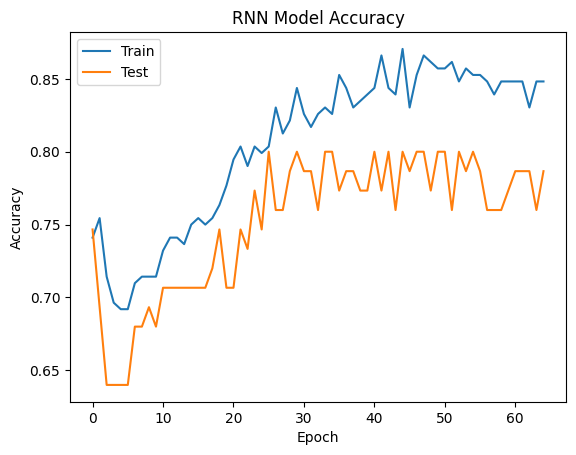

In [70]:
train_acc_rnn = history_rnn.history['accuracy']
test_acc_rnn = history_rnn.history['val_accuracy']
# plot the train and test accuracy
plt.plot(train_acc_rnn, label='Train')
plt.plot(test_acc_rnn, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Model Accuracy')
plt.legend()
plt.show()

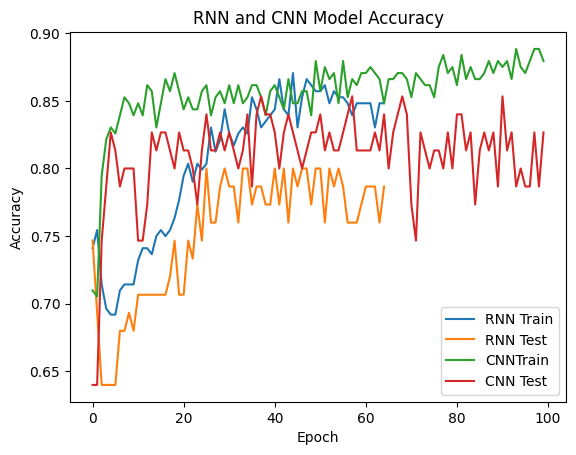

In [73]:
train_acc_rnn = history_rnn.history['accuracy']
test_acc_rnn = history_rnn.history['val_accuracy']

train_acc_CNN = history.history['accuracy']
test_acc_CNN = history.history['val_accuracy']

# plot the train and test accuracy
plt.plot(train_acc_rnn, label='RNN Train')
plt.plot(test_acc_rnn, label='RNN Test')
plt.plot(train_acc_CNN, label='CNNTrain')
plt.plot(test_acc_CNN, label='CNN Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN and CNN Model Accuracy')
plt.legend()
plt.show()


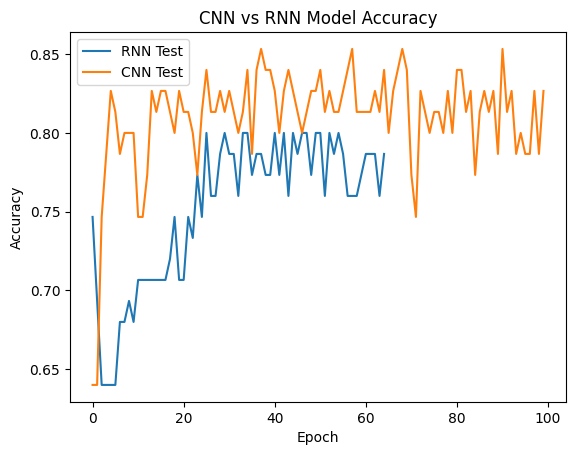

In [74]:
test_acc_rnn = history_rnn.history['val_accuracy']
test_acc_CNN = history.history['val_accuracy']

# plot the train and test accuracy
plt.plot(test_acc_rnn, label='RNN Test')
plt.plot(test_acc_CNN, label='CNN Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN vs RNN Model Accuracy')
plt.legend()